<a href="https://colab.research.google.com/github/raresrosca/CIFAR10_classification/blob/master/CIFAR10_classification_customReLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = tv.datasets.CIFAR10(root = '/content/data',
                              train = True, download = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 4)

testset = tv.datasets.CIFAR10(root = '/content/data',
                             train = False, download = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


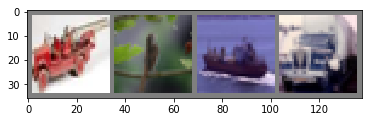

truck bird shiptruck


In [3]:
import matplotlib.pyplot as plt
import numpy as np

#functions to show an image

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()
  
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#show images
imshow(tv.utils.make_grid(images))

# print labels
print(''.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
# define the custom relu function that is 0 for all x<0.2 or else it is x-0.2 
def crelu(inputs): 
  
  print(inputs.shape)
  a, b, c, d = inputs.shape
  print(a, b, c ,d)
  inputs = inputs.view(-1)
  for i in range(len(inputs)):
    if(inputs[i] <= 0.2):
      inputs[i] = 0
    else:
      inputs[i] = inputs[i] - 0.2
  
  inputs = inputs.view(a, b, c, d)
  return inputs
      
  
    

In [0]:

class cReLU(nn.Module):
  def __init__(self):
    super().__init__() #init the base class
    
  def forward(self, input):
    return crelu(input)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(crelu(self.conv1(x)))
        x = self.pool(crelu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [122]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
model = Net().to(device)

In [124]:
print(model)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

In [0]:
epochs_number = 3

In [129]:
# ======= Train the network =======

for epoch in range(epochs_number):
  
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device) 
    
    #zero the parameter gradients
    optimizer.zero_grad()
    
    #forward + backward + optimize
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    #print statistics
    running_loss = running_loss + loss.item()
    if i % 2 == 1:   #print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' %(epoch+1, i+1, running_loss/2))
      running_loss = 0.0
      

    

torch.Size([4, 6, 28, 28])
4 6 28 28
torch.Size([4, 16, 10, 10])
4 16 10 10
torch.Size([4, 6, 28, 28])
4 6 28 28
torch.Size([4, 16, 10, 10])
4 16 10 10
[1,     2] loss: 2.269
torch.Size([4, 6, 28, 28])
4 6 28 28
torch.Size([4, 16, 10, 10])
4 16 10 10
torch.Size([4, 6, 28, 28])
4 6 28 28
torch.Size([4, 16, 10, 10])
4 16 10 10
[1,     4] loss: 2.325
torch.Size([4, 6, 28, 28])
4 6 28 28
torch.Size([4, 16, 10, 10])
4 16 10 10
torch.Size([4, 6, 28, 28])
4 6 28 28
torch.Size([4, 16, 10, 10])
4 16 10 10
[1,     6] loss: 2.315
torch.Size([4, 6, 28, 28])
4 6 28 28
torch.Size([4, 16, 10, 10])
4 16 10 10
torch.Size([4, 6, 28, 28])
4 6 28 28
torch.Size([4, 16, 10, 10])
4 16 10 10
[1,     8] loss: 2.338
torch.Size([4, 6, 28, 28])
4 6 28 28
torch.Size([4, 16, 10, 10])
4 16 10 10
torch.Size([4, 6, 28, 28])
4 6 28 28
torch.Size([4, 16, 10, 10])
4 16 10 10
[1,    10] loss: 2.318
torch.Size([4, 6, 28, 28])
4 6 28 28
torch.Size([4, 16, 10, 10])
4 16 10 10
torch.Size([4, 6, 28, 28])
4 6 28 28
torch.Size([

KeyboardInterrupt: ignored

In [0]:
 a = torch.rand([4,6,28,28])

In [95]:
a.shape

torch.Size([4, 6, 28, 28])